In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:99% !important;}
div.cell.code_cell.rendered{width:90%;}
div.text_cell_render.rendered_html{width:90%;}
div.CodeMirror {font-family:Consolas; font-size:19pt;}
div.output {font-size:19pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:19pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
span.toc-item-num{display:none;}
div.text_cell_render ul li{font-size:16pt;padding:5px;}
div.CodeMirror-lines > div {padding-left:10px;}
table.dataframe{font-size:18px;}
</style>
"""))

<font size="5" color="red">ch3. 분류분석</font>
# 1절. 분류분석 개요

- scikit-learn 공식 사이트 : http://scikit-learn.org
- scikit-learn 도큐먼트 : http://scikit-learn.org/stable

``` pip install scikit-learn```

## 1-1 tensorflow(DL)나 scikit-learn(ML) 샘플용 데이터 셋 접근방법

### load 계열(패키지 내 데이터를 갖고 있음)

### fetch 계열(패키지가 데이터를 갖고 있지 않고 함수 호출시 인터넷 다운)

### make 계열
    - make_classification() : 분류분석용 데이터 생성
    - make_regression() : 회귀분석용 데이터 생성

In [3]:
# load 계열
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
(X_train, y_train),(X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

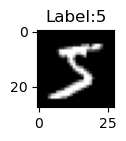

In [4]:
plt.figure(figsize=(1,1))
plt.imshow(X_train[0], cmap='gray')
plt.title(f'Label:{y_train[0]}')
plt.show()

In [7]:
# fetch 계열
from sklearn.datasets import fetch_openml #iris, mnist, wine, fashion-MNIST
import numpy as np
mnist = fetch_openml(name='mnist_784', parser='auto', version=1, as_frame=False)

In [9]:
X, y = mnist.data, mnist.target.astype(np.uint8) # y는 unsigned int로 변환
X.shape, y.shape

((70000, 784), (70000,))

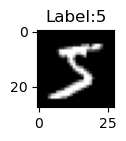

In [10]:
plt.figure(figsize=(1,1))
plt.imshow(X[0].reshape(28,28), cmap='gray')
plt.title(f'Label:{y[0]}')
plt.show()

In [13]:
iris = fetch_openml(name='iris', version=1)
X, y = iris.data, iris.target
y[0]

'Iris-setosa'

# 2절. 분류분석의 종류(pt 8)
## 2-1 확률적 모형
- 주어진 데이터에 대해 각 클래스(그룹)가 정답일 조건부 확률을 계산하는 모형
- 함수 : predict(값), predict_proba()-각분류클래스별 확률, predict_log_proba()-확률의로그값

### 1) 확률적 생성 모형 
 - 베이즈 정리를 사용한 확률적 생성 모형
 ```
 ex) sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis(이차판별분석 모형)
     sklearn.naive_bayes.MultinomialNB(나이브 베이지안)
 ```
### 2) 확률적 판별모형
 - 조건부 확률 함수를 추정하는 확률적 판별 모형
 ```
 ex) sklearn.linear_model.LogisticRegression(로지스틱회귀분석)
     sklearn.tree.DecisionTreeClassifier(의사결정나무)
 ```

## 2-2 판별함수 모형
- 주어진 데이터를 클래스에 따라 서로 다른 영역으로 나누는 경계면을 찾은 후 이 경계면으로부터 주어진 데이터가 어느 위치에 있는지를 계산하는 판별함수를 이용하는 모형
- 함수 : predict(값), decision_function(값)-어떤클래스로분류되는정도
```
    ex)sklearn.linear_model.Perceptron(퍼셉트론)
       sklearn.svm.SVC(서포트 벡터 머신)
       sklearn.neural_network.MLPClassifier(다중신경망) 
```
=> RandomForest, XGBoost, LGBM, CatBoost등의 앙상블 모형이 더 많이 사용

# 3절. 분류분석모형1. 확률적 생성 모형
# 3-1. QDA(Quadratic Discriminant Analysis) ; 이차판별분석법
- 독립변수 실수이고 다변수 정규분포라고 가정(pt. 11~12)

In [14]:
# 샘플데이터 생성
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html
from sklearn.datasets import make_classification
X, y = make_classification(#n_samples=100,
                           n_features=2, # 독립변수 갯수
                           n_informative=2, # 종속변수에 영향을 미치는 독립변수 갯수 
                           n_redundant=0, # 독립변수 중 독립변수끼리 선형관계가 있는 수 
                           n_classes=2,   # 종속변수의 클래스 수 
                           n_clusters_per_class=1, # 클래스 당 군의 갯수 
                           random_state=9) # random seed값
X.shape, y.shape

((100, 2), (100,))

In [17]:
import pandas as pd
import numpy as np
print(pd.Series(y).unique())
print(np.unique(y))

[0 1]
[0 1]


In [21]:
X0 = X[y==0] # 0인 그룹의 독립변수
X1 = X[y==1] # 1인 그룹의 독립변수

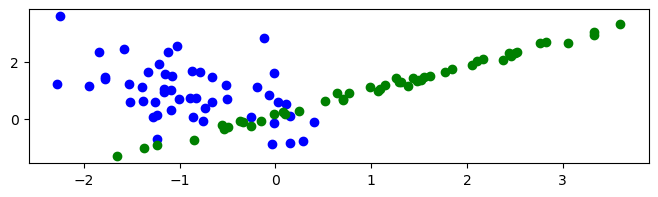

In [26]:
plt.figure(figsize=(8,2))
plt.scatter(X0[:,0], X0[:,1], c='b')
plt.scatter(X1[:,0], X1[:,1], c='g')

In [27]:
len(X0), len(X1)

(50, 50)

In [28]:
# 대칭구조를 만들기
X[y==1] = -X[y==0]

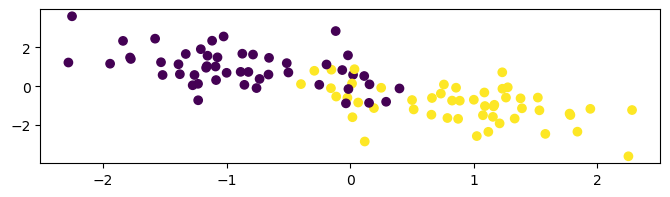

In [29]:
plt.figure(figsize=(8,2))
plt.scatter(X[:,0], X[:,1], c=y)

In [30]:
# QDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
model = QuadraticDiscriminantAnalysis()
model.fit(X, y)

QuadraticDiscriminantAnalysis()

In [34]:
x = [[0,0]]
model.predict(x) # 예측

array([0])

In [35]:
model.predict_proba(x) # 각 class별 확률

array([[0.5, 0.5]])

In [36]:
model.predict_log_proba(x) # 확률의 로그값

array([[-0.69314718, -0.69314718]])

In [37]:
model.classes_

array([0, 1])

In [38]:
model.score(X, y) # accuracy

0.88

In [39]:
y_hat = model.predict(X)
pd.crosstab(y, y_hat, colnames=['예측'], rownames=['실제'])

예측,0,1
실제,,
0,44,6
1,6,44


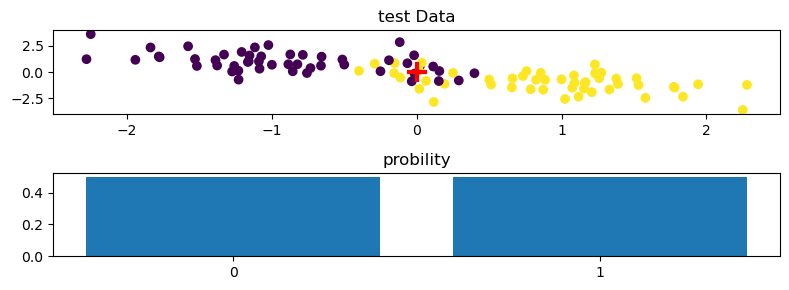

In [49]:
# 교안 pt. 13
plt.figure(figsize=(8,3))
x = [[0,0]]
p = model.predict_proba(x) #[[0.5,0.5]]
plt.subplot(211)
plt.scatter(X[:,0], X[:,1], c=y)
plt.scatter(x[0][0], x[0][1], c='r', marker='+', s=200, lw=3)
plt.title('test Data')
plt.subplot(212)
plt.bar(model.classes_, p[0])
plt.xticks(model.classes_)
plt.title('probility')
plt.tight_layout()
plt.show()

[[0.83544581 0.16455419]]


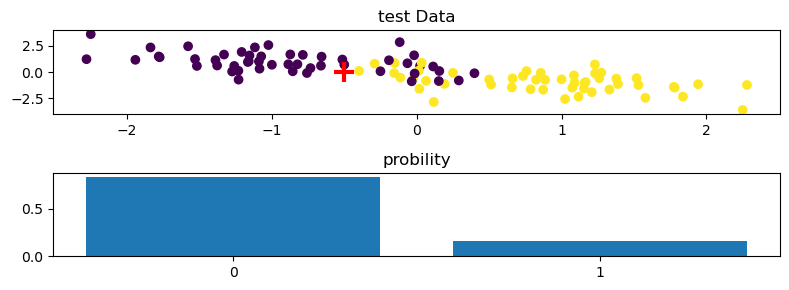

In [54]:
plt.figure(figsize=(8,3))
x = [[-0.5,0]]
p = model.predict_proba(x)
print(p)
plt.subplot(211)
plt.scatter(X[:,0], X[:,1], c=y)
plt.scatter(x[0][0], x[0][1], c='r', marker='+', s=200, lw=3)
plt.title('test Data')
plt.subplot(212)
plt.bar(model.classes_, p[0])
plt.xticks(model.classes_)
plt.title('probility')
plt.tight_layout()
plt.show()

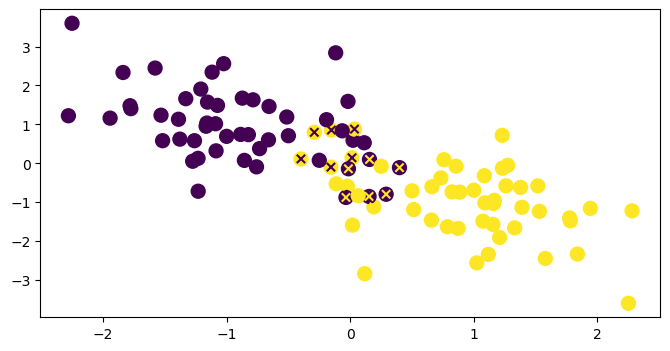

In [59]:
y_hat = model.predict(X)
plt.figure(figsize=(8,4))
plt.scatter(X[:,0], X[:,1], c=y, s=100)
plt.scatter(X[:,0], X[:,1], c=y_hat, marker='x')